#KNN Model



The goal of this assignment is to use Python to build a KNN model that is suitable for a given classification task.

#### Part 1.  
Build a KNN to do handwritten digits prediction. The data consists of grey-scale images of handwritten digits. Each image is a set of pixels stored as a vector.

Code below is to import the necessary packages. You may import additional packages if the extra libraries help you plot, get accuracy scores, etc. We would be happy to learn what other packages are useful in those scenarios.
For any portion related to implementing KNN or normalization, I would not recommend importing other libraries since we will be checking if your code demonstrates your understanding of the concepts.  For example, if you applied normalization using a packaged method, we can't determine if you understood the normalization process, and we cannot award you points.

In [24]:
#I recommend understanding the purpose of each package we are loading below.
from sklearn.datasets import load_digits, load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline

Load the MNIST dataset. (Can take up to 3 minutes.) `x` stores the images and `y` stores the labels. For an image i, $x_{i}$ is a vector of its pixel values, and $y_{i}$ is its label. $y_{i} \in [1,2,3,4,5,6,7,8,9,0] $ .

In [25]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
x = mnist.data.to_numpy(dtype= np.int64)
y = mnist.target.to_numpy(dtype= np.int64)

Separate training and testing data randomly.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x[:2500], y[:2500], test_size=0.2, random_state=123, stratify=y[:2500])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2000, 784)
(500, 784)
(2000,)
(500,)


#### 1.1 (5 points)

For convinence, we have created a class object `knn` for storing our KNN model. Please fill in the missing instance methods. You are free to modify the input parameters or add additional instance methods. Make sure your code outputs the responses our questions ask for.

Instance method `fit` is the training process. For KNN, it is simply storing the training dataset.

Instance method `distance` is a function that takes in two vectors (samples of data) and returns the distance between the two vectors. (1.5 points)

Hint: Try your best to avoid using for loops in `self.distance`. Or it might take too long for KNN to compute. However, no point will be deducted for using for loops.

Instance method `predict` uses the KNN method to predict a given set of digit images. If the input is an N-y-d-dimensional matrix, where d is the number of features and N is the number of samples, the output should be an N-dimensional vector. (3 points)

Hint: Here are some useful numpy functions to help you achieve your goal: np.square, np.sqrt, np.zeros, np.ones, np.argsort, np.bincount, np.linalg.norm, np.dot, np.equal, np.mean, np.argmax

Instance method `score` produces the test accuracy of the KNN model when running on a test dataset. Test accuracy is the percentage of the test data that is correctly classified. (Hint: you will first need to call `self.predict` to label the input test data.) (0.5 points)


In [27]:
class knn:
  def __init__(self, k):
    self.k = k
    self.X_train = None
    self.Y_train = None

  def fit(self, X, Y):
    self.X_train = X
    self.Y_train = Y


  def distance(self, x1, x2):
    return np.linalg.norm(x1 - x2)

          # returns the distance between two vectors
          # Use L2 norm as your distance function here.
          # your solution here
          # problem 1.1.1 , 1.5 points
          #pass

  def predict(self, x_test):
    predictions = []

    for test_point in x_test:
      distances = np.array([self.distance(test_point, train_point)
      for train_point in self.X_train])

      nearest_indices = np.argsort(distances)[:self.k]

      nearest_labels = self.Y_train[nearest_indices]

      predicted_label = np.bincount(nearest_labels.flatten().astype(int)).argmax()

      predictions.append(predicted_label)

    return np.array(predictions)


          # returns the predictions for multiple examples X
          # your solution here
          # problem 1.1.2 , 3 points
          #pass


  def score(self, x_test, y_test):
    y_pred = self.predict(x_test)
    return np.mean(y_pred == y_test)
          # Return the accuracy of your model on the test dataset.
          # problem 1.1.3, 0.5 point
          #pass



Compare the accuracy using our KNN model with the accuracy using Sklearn KNN to see if we have implemented KNN correctly. The two accuracy scores should be fairly close.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors = 5)
sklearn_knn.fit(X_train, Y_train)
sklearn_knn_score = sklearn_knn.score(X_test, Y_test)
print("sklearn_knn_score:", sklearn_knn_score)

our_knn = knn(k = 5)
our_knn.fit(X_train, Y_train)
our_knn_score = our_knn.score(X_test, Y_test)
print("our_knn_score:", our_knn_score)


sklearn_knn_score: 0.912
our_knn_score: 0.912


Let's visualize the images that are being misclassified and compare them to the ones that are correctly classified. This will help us to see the potential problems of our model. You can change the code below to see more images.

In [29]:
Y_pred = our_knn.predict(X_test)

incorrect = [i for i, x in enumerate(Y_pred!=Y_test) if x]
correct = [i for i, x in enumerate(Y_pred==Y_test) if x]

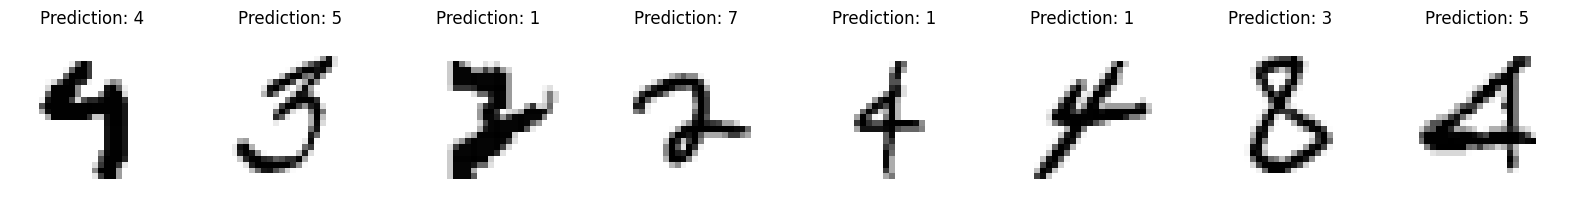

In [30]:
NUM_OF_IMAGES = 8 # number of images to display
_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 0 # start index of the images to display, you can change this if you wish
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[incorrect[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[incorrect[ind]]}")


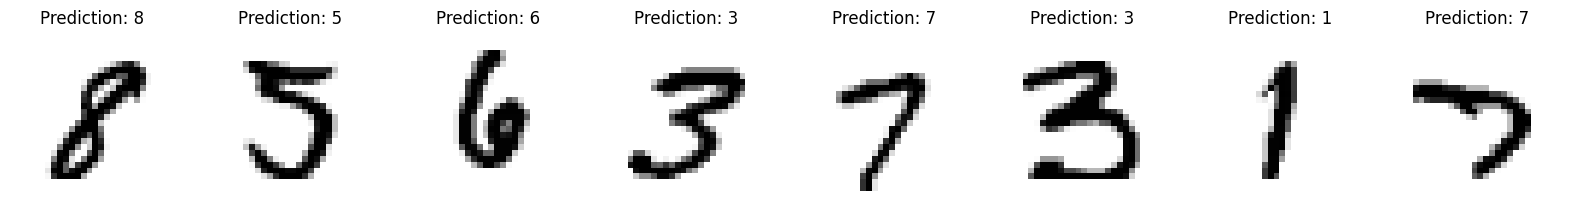

In [31]:

_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 120 # start index of the images to display, you can change this if you wish
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[correct[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[correct[ind]]}")

#### 1.2 (4 points)


Test the training and test accuracy using any sets of k-values ($k \in \mathbb{Z}^{+}$, at least 10 different k-values in your set)  and plot the results with the x axis as the values of the k-value you picked and the y axis as the accuracies.
You can plot it on two separate graphs or the same one. Please retain the code you used to generate your results in the code cell below. Make sure to clearly label which plot is for the training accuracy and which plot is for the test accuracy. The type of graph you choose has to indicate the trend you observe clearly.

Good time to grab a coffee if it takes too long to run.

NOTE: Use the KNN model you built for this task. For generating training accuracy, you can add a new method similar to the `score` method, but it instead outputs training accuracy instead of test accuracy.


Plot(s) (2 point)

**Answer the following questions**

What is the trend of your plot?        (1 point) <br/>
Answer:

From the plot, you can see that as the number of neighbors (k) increases, the training accuracy slowly goes down. That makes sense because with fewer neighbors, the model is more flexible and tends to memorize the training data, which results in very high accuracy. As you increase k, the model becomes more generalized and less likely to overfit. The test accuracy, on the other hand, starts off a bit lower, climbs up slightly, and then begins to drop again after a certain point.

Which k value produces the optimal results? (Which k produces the highest test accuracy?)    (1 point)<br/>
Answer:
The best results come when k is set to 3. That’s where the test accuracy is the highest, around 0.918.


Optimal k: 3
Test score: 0.918


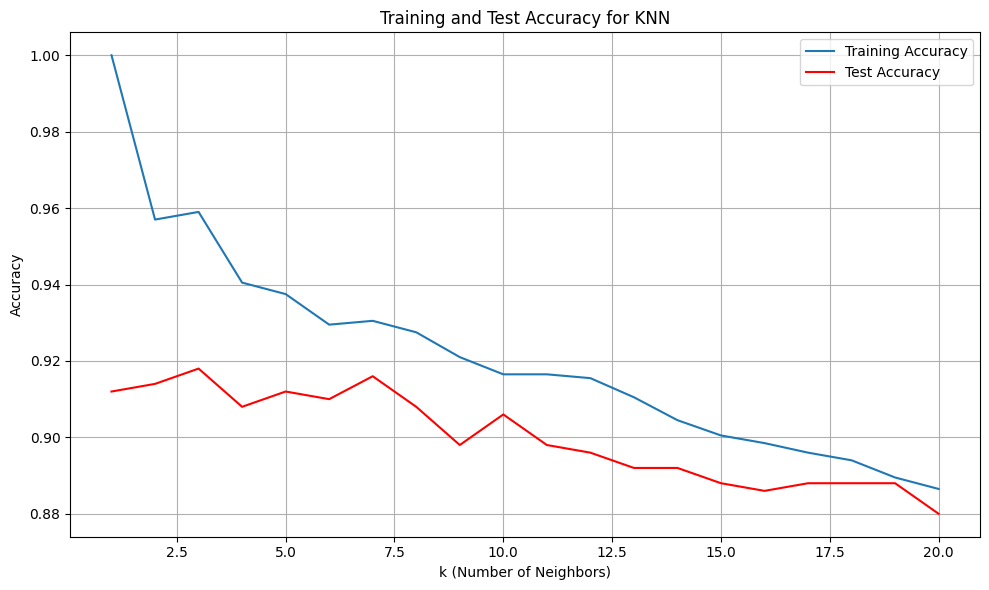

In [32]:
# Code for plots (2 points as mentioned above)
k_values = range(1, 21)

train_list = []
test_list = []

for k in k_values:
    our_knn = knn(k=k)
    our_knn.fit(X_train, Y_train)

    train_score = our_knn.score(X_train, Y_train)
    test_score = our_knn.score(X_test, Y_test)

    train_list.append(train_score)
    test_list.append(test_score)

optimal_k_index = np.argmax(test_list)
optimal_k = k_values[optimal_k_index]
optimal_score = test_list[optimal_k_index]

print("Optimal k:", optimal_k)
print("Test score:", optimal_score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_list, label='Training Accuracy')
plt.plot(k_values, test_list, label='Test Accuracy', color='red')
plt.title("Training and Test Accuracy for KNN")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Got help from ChatGPT to understand the concept

#### 1.3 (5 points)

Choose one other distance function from below or create your own distance function. Below is a list of distance functions that you could try. You can use the optimal k-value from Q1.2; however, in the real world, we would need to find the optimal k-value again with the new distance function. Create a new `knn` class if you need to, but not necessary.

1. Manhattan Distance
2. Cosine Distance
3. L-Infinity norm


In [33]:
"""
You can use built-in Numpy methods to implement your distance formula
but be sure to understand what equations those methods are using,
as well as commenting on the formula that those methods use.
"""
# Write the Python implementation here (1.5 points)

class knn_manhattan:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.Y_train = None

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def distance(self, x1, x2):
        # chose the Manhattan Distance - L1 norm
        # The formula is the sum of absolute differences
        return np.sum(np.abs(x1 - x2))

    def predict(self, x_test):
        predictions = []

        for test_point in x_test:
            distances = np.array([self.distance(test_point, x) for x in self.X_train])
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.Y_train[nearest_indices]
            predicted_label = np.bincount(nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return np.mean(y_pred == y_test)



our_knn = knn_manhattan(k = 3)
our_knn.fit(X_train, Y_train)
our_knn_score = our_knn.score(X_test, Y_test)
print("our_knn_score:", our_knn_score)


our_knn_score: 0.91



**Write answers to the following questions. Answers have to demonstrate critical thinking. **

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer:

The distance function that I chose is the Manhattan Distance also known as the L1 norm. The equation is:
         
D(x,y) = n∑i=1 |xi - yi|
        
So, this function computes the total absolute difference between each pixel in two images.  

Describe issues with using the L2 norm? Tie your response to the L2 norm equation. (Your answer has to be specific to the task in this assignment. Hint: Since handwritten digits are stored in image data, when a L2 norm KNN woluld have a difficult time classifying this type data; yet, it would be easy for a human to do so?): (2 points)<br/>
Answer:

One issue with using the L2 norm in handwritten digit classification is that it is very sensitive to small variations in pixel intensity. Especially when these variations spread across many pixels. So the L2 distance formula is:

D(x,y) = sqrt(n∑i=1 (xi - yi)^2)

This equation squares the difference between each pixel which means that the larger differences have an even bigger impact on the total distance. In handwirtten digits, small shifts in writing style like a slightly thicker stroke or a digit written a few pixels to the left can cause large L2 distances even though the digits are the same to us.

As a result, L2 norm may struggle to classify visually similar digits that are written in slightly different ways. Two 3s with minor stroke differences can have a large L2 distance while a 3 and 8 written with similar shape may have a smaller L2 distance because of the way that the pixels line up.

What do you think is the reason your distance function performs better, worse, or similarly to L2 norm (has to be specific to the task in this assignment)? (1 point)<br/>
Answer:

I used the Manhattan distance, and it gave similar results to the L2 norm. This is likely because both methods look at raw pixel values, which can change a lot depending on how someone writes a digit. But the Manhattan distance is a bit more flexible instead of squaring the differences like L2 does, it just adds up how different each pixel is. That means small changes in how the digit is written (like a thicker line or a slight shift) don’t affect the result as much. So even though both methods are similar, Manhattan distance might work a little better for comparing digits that look the same overall but are written a little differently.


### Problem 2

In this problem, we will be using the wine classification dataset. Before optimizing our KNN model, it is imperative to understand the properties of our dataset.

More information about the dataset is linked below:

https://archive.ics.uci.edu/ml/datasets/wine

In [34]:
wine = load_wine()
X = wine.data
print(X.shape)
Y = wine.target
print(Y.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)

(178, 13)
(178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']


#### 2.1  (3 points)

Now, let’s classify the wine dataset using our KNN with the L2 norm as the distance function. Choose the optimal k value for this task and record your approach.

You might need to change the k value a couple of times to find the one with the highest average test accuracy. Feel free to add a for loop.

Since we have limited data, we can use K-folds to assess the performance of our model more accurately.

Note: KFold is a tool from Sklearn that helps you prepare your data for k-fold cross-validation (I know, the letter k is a little overused in ML... K-folds, K-NN, K-means...) This line of code creates an instance of the tool with k, the number of folds, which equals 5, meaning each fold is 1/5 the size of the entire dataset. For each fold, we take the fold as the test set and the rest as the training set. When `n_splits` = 5, we will " train" the KNN 5 times and "test" it 5 times. Exactly which sample goes into which fold is random. (parameter `shuffle = True`)
Link to documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

For each k-value, store the accuracy of each test in a list so we can take the average of the accuracy scores. Each accuracyt list should be `n_splits` long. Use the averages to determine which k is the optimal k-value.

NOTE: Use the KNN model you built for this task.


In [35]:

kf = KFold(n_splits=5, shuffle=True, random_state=123) # Do not change the arguments.

# Your implementation for finding the optimal k-value below

k_range = range(1, 21)
average_scores = []

for k in k_range:
    fold_accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        model = knn(k)
        model.fit(X_train, Y_train)
        acc = model.score(X_test, Y_test)
        fold_accuracies.append(acc)

    avg_accuracy = np.mean(fold_accuracies)
    average_scores.append(avg_accuracy)
    print(f"k = {k}: Average Accuracy = {avg_accuracy:.4f}")

best_k = k_range[np.argmax(average_scores)]
best_score = max(average_scores)
print(f"\nOptimal k is {best_k} with average accuracy {best_score:.4f}")

#Got help from Gemini - for syntax

k = 1: Average Accuracy = 0.7303
k = 2: Average Accuracy = 0.6741
k = 3: Average Accuracy = 0.7135
k = 4: Average Accuracy = 0.6687
k = 5: Average Accuracy = 0.7135
k = 6: Average Accuracy = 0.7029
k = 7: Average Accuracy = 0.7306
k = 8: Average Accuracy = 0.7252
k = 9: Average Accuracy = 0.7195
k = 10: Average Accuracy = 0.7086
k = 11: Average Accuracy = 0.6862
k = 12: Average Accuracy = 0.6638
k = 13: Average Accuracy = 0.6749
k = 14: Average Accuracy = 0.6805
k = 15: Average Accuracy = 0.6913
k = 16: Average Accuracy = 0.7027
k = 17: Average Accuracy = 0.6970
k = 18: Average Accuracy = 0.6913
k = 19: Average Accuracy = 0.6857
k = 20: Average Accuracy = 0.6802

Optimal k is 7 with average accuracy 0.7306



#### 2.2 (4 points)
Again, we would like to change our distance function to best fit our classification problem. Choose a distance function from what we have listed or use your own. It can be the same one from problem 1.3. Set k equal to the optimal k-value you have found.


(It is okay if the new distance function performs worse than using the L2 norm. You just need to write the new distance function and apply KNN to the dataset.)

In [36]:
# Python implementation (1.5 points)
# You can keep the code you wrote for testing the new distance function.


fold_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = knn_manhattan(k=7)
    model.fit(X_train, Y_train)
    acc = model.score(X_test, Y_test)
    fold_accuracies.append(acc)

average_accuracy = np.mean(fold_accuracies)
print(f"Average Accuracy w/ Manhattan distance: {average_accuracy:.4f}")

#Got help from Gemini for ideating and syntax

Average Accuracy w/ Manhattan distance: 0.7584




**Write answers to the following questions**

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer:

The distance function that I chose is the Manhattan Distance also known as the L1 norm. The equation is:

D(x,y) = n∑i=1 |xi - yi|


What do you think is the reason your distance function performs better or worse than the L2 norm? (2 points) (Your answer has to be specific to the task in this assignment. Hint: In this dataset, each feature is a property of a type of wine. When would a L2 norm KNN have a difficult time classifying this data, but easy for a human to do so, assuming we have good taste buds for wine?)<br/>
Answer:

In this assignment, the L2 norm performed slightly worse/similar than the Manhattan distance, with an accuracy of 0.7306 compared to 0.7584. The Manhattan distance performs slightly better than the L2 norm (Euclidean distance) because Manhattan distance is less sensitive to outliers and large variations in singular features.
Each feature in this dataset represents a specific chemical property of the wine. These features may not be on the same scale or may have differing levels of importance. For example, a slight change in alcohol content may impact the taste more than others.
I think the L2 norm amplifies large differences in any single feature due to squaring. This might mislead the model if that feature isn’t actually the most important one for classification.
On the contrary, Manhattan distance adds up the differences in each feature directly, which makes it less sensitive to outliers. That’s helpful in a task like wine classification, where small differences across properties can add up to a noticeable change.
For example, if there was a person experienced with wines, they would judge two different wines by picking up the small variations rather than looking at the one strong difference. In this case, I believe the Manhattan distance might give a balanced comparison between the samples.

#### 2.3 (3 points)

We can further improve the accuracy of our model by normalizing the dataset.  

Data can be normalized using the following equation:

$$ x_{ij}^{normalized} = \frac{x_{ij} -\mu_{j}}{\sigma_{j}} $$
Where $x_{ij}$ is the value of feature j of sample i,

$\mu_{j} $ and $\sigma_{j}$ are the mean and the standard deviation of feature j.

Normalize the wine dataset using the equation above and apply your KNN model (with the best k-value and distance function you have found) on the normalized dataset.

Print the new average test accuracy score after performing k-fold cross-validation.

In [37]:
# YOUR CODE HERE:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

fold_accuracies = []

for train_idx, test_idx in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_idx], X_normalized[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    model = knn_manhattan(k=1)
    model.fit(X_train, Y_train)
    fold_accuracies.append(model.score(X_test, Y_test))

avg_accuracy = np.mean(fold_accuracies)

print(f"New Average Accuracy: {avg_accuracy:.4f}")

New Average Accuracy: 0.9775


### 2.4 (3 Points)
Why do you think normalization can make a large improvement to our classification accuracy? Explain your answer by comparing the feature with the largest variance against the feature with the smallest variance.  You will need to find the feature names of those features. (Hint: see code block right above Q2.1)

Normalization can make a large improvement for sure for our classification accuracy because it helps ensure all the features contribute equally to the distance calculation. Without normalization, features with larger variance will take over the result.

I think normalization can make a large improvement to the classification accuracy especially when features have widely different variances as seen in this data. So, proline has a variance of 98609.6 and nonflavanoid_phenols has a variance of 0.02. This matters because distance based models can assume that all features are on comparable scales. Without normalization, features like proline with a huge variance is taking over the decision making of the model while features like nonflavanoid_phenols are ignored even if they are crucial or important for classification. This means that the model may perform poorly because it overemphasizes features just because they have large variance values not because they are more informative. So normalization can ensure that smaller features aren't overlooked because these features can have useful information.

In [38]:
# Use this code block to find the answer above.

feature_names = wine.feature_names
variances = np.var(X, axis=0)
for name, var in zip(feature_names, variances):
    print(f"{name}: {var:.2f}")

alcohol: 0.66
malic_acid: 1.24
ash: 0.07
alcalinity_of_ash: 11.09
magnesium: 202.84
total_phenols: 0.39
flavanoids: 0.99
nonflavanoid_phenols: 0.02
proanthocyanins: 0.33
color_intensity: 5.34
hue: 0.05
od280/od315_of_diluted_wines: 0.50
proline: 98609.60
